# Cardiovascular risk factors analysis

### Imports

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


In [139]:
df = pd.read_csv('cardio_train.csv', delimiter=';')

### Dataset statistical analysis

First we search for missing values

In [140]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Then we use head() and describe() to have an overview of our dataset

In [141]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We can see that there is an 'id' column that is useless so we will have to remove it.
We also can see that the age is expressd in days which isn't really practical for us so we might want to change that.
There is some clear outliers in the blood pressure features that will also be removed, some values regarding the height and weight (even tho looking almost normal compared to the blood pressure) will get removed from the dataset

In [143]:
# Drop the id column
df.drop("id", axis=1, inplace=True)

# Convert age from days to years
df['age'] = df['age'] // 365

In [144]:
# Drop rows with abnormal blood pressure readings and abnormal weight / height readings
df = df.drop(df[(df['ap_hi'] > 180) | (df['ap_hi'] < 90) | (df['ap_lo'] > 110) | (df['ap_lo'] < 60)].index)
df = df.drop(df[(df['weight'] > 130) | (df['weight'] < 45)].index)
df = df.drop(df[(df['height'] > 200) | (df['height'] < 120)].index)

In [145]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67538.000000,67538.000000,67538.000000,67538.000000,67538.000000,67538.000000,67538.00000,67538.000000,67538.000000,67538.000000,67538.000000,67538.000000
mean,52.829192,1.349596,164.461325,74.024056,126.363795,81.193328,1.36227,1.224348,0.087743,0.053007,0.803340,0.493233
std,6.766019,0.476846,7.859903,13.618282,15.798349,8.956690,0.67745,0.570440,0.282923,0.224049,0.397476,0.499958
min,29.000000,1.000000,120.000000,45.000000,90.000000,60.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,198.000000,130.000000,180.000000,110.000000,3.00000,3.000000,1.000000,1.000000,1.000000,1.000000


As we can see now the dataset is much cleaner, but we will make sure of that with some boxplots

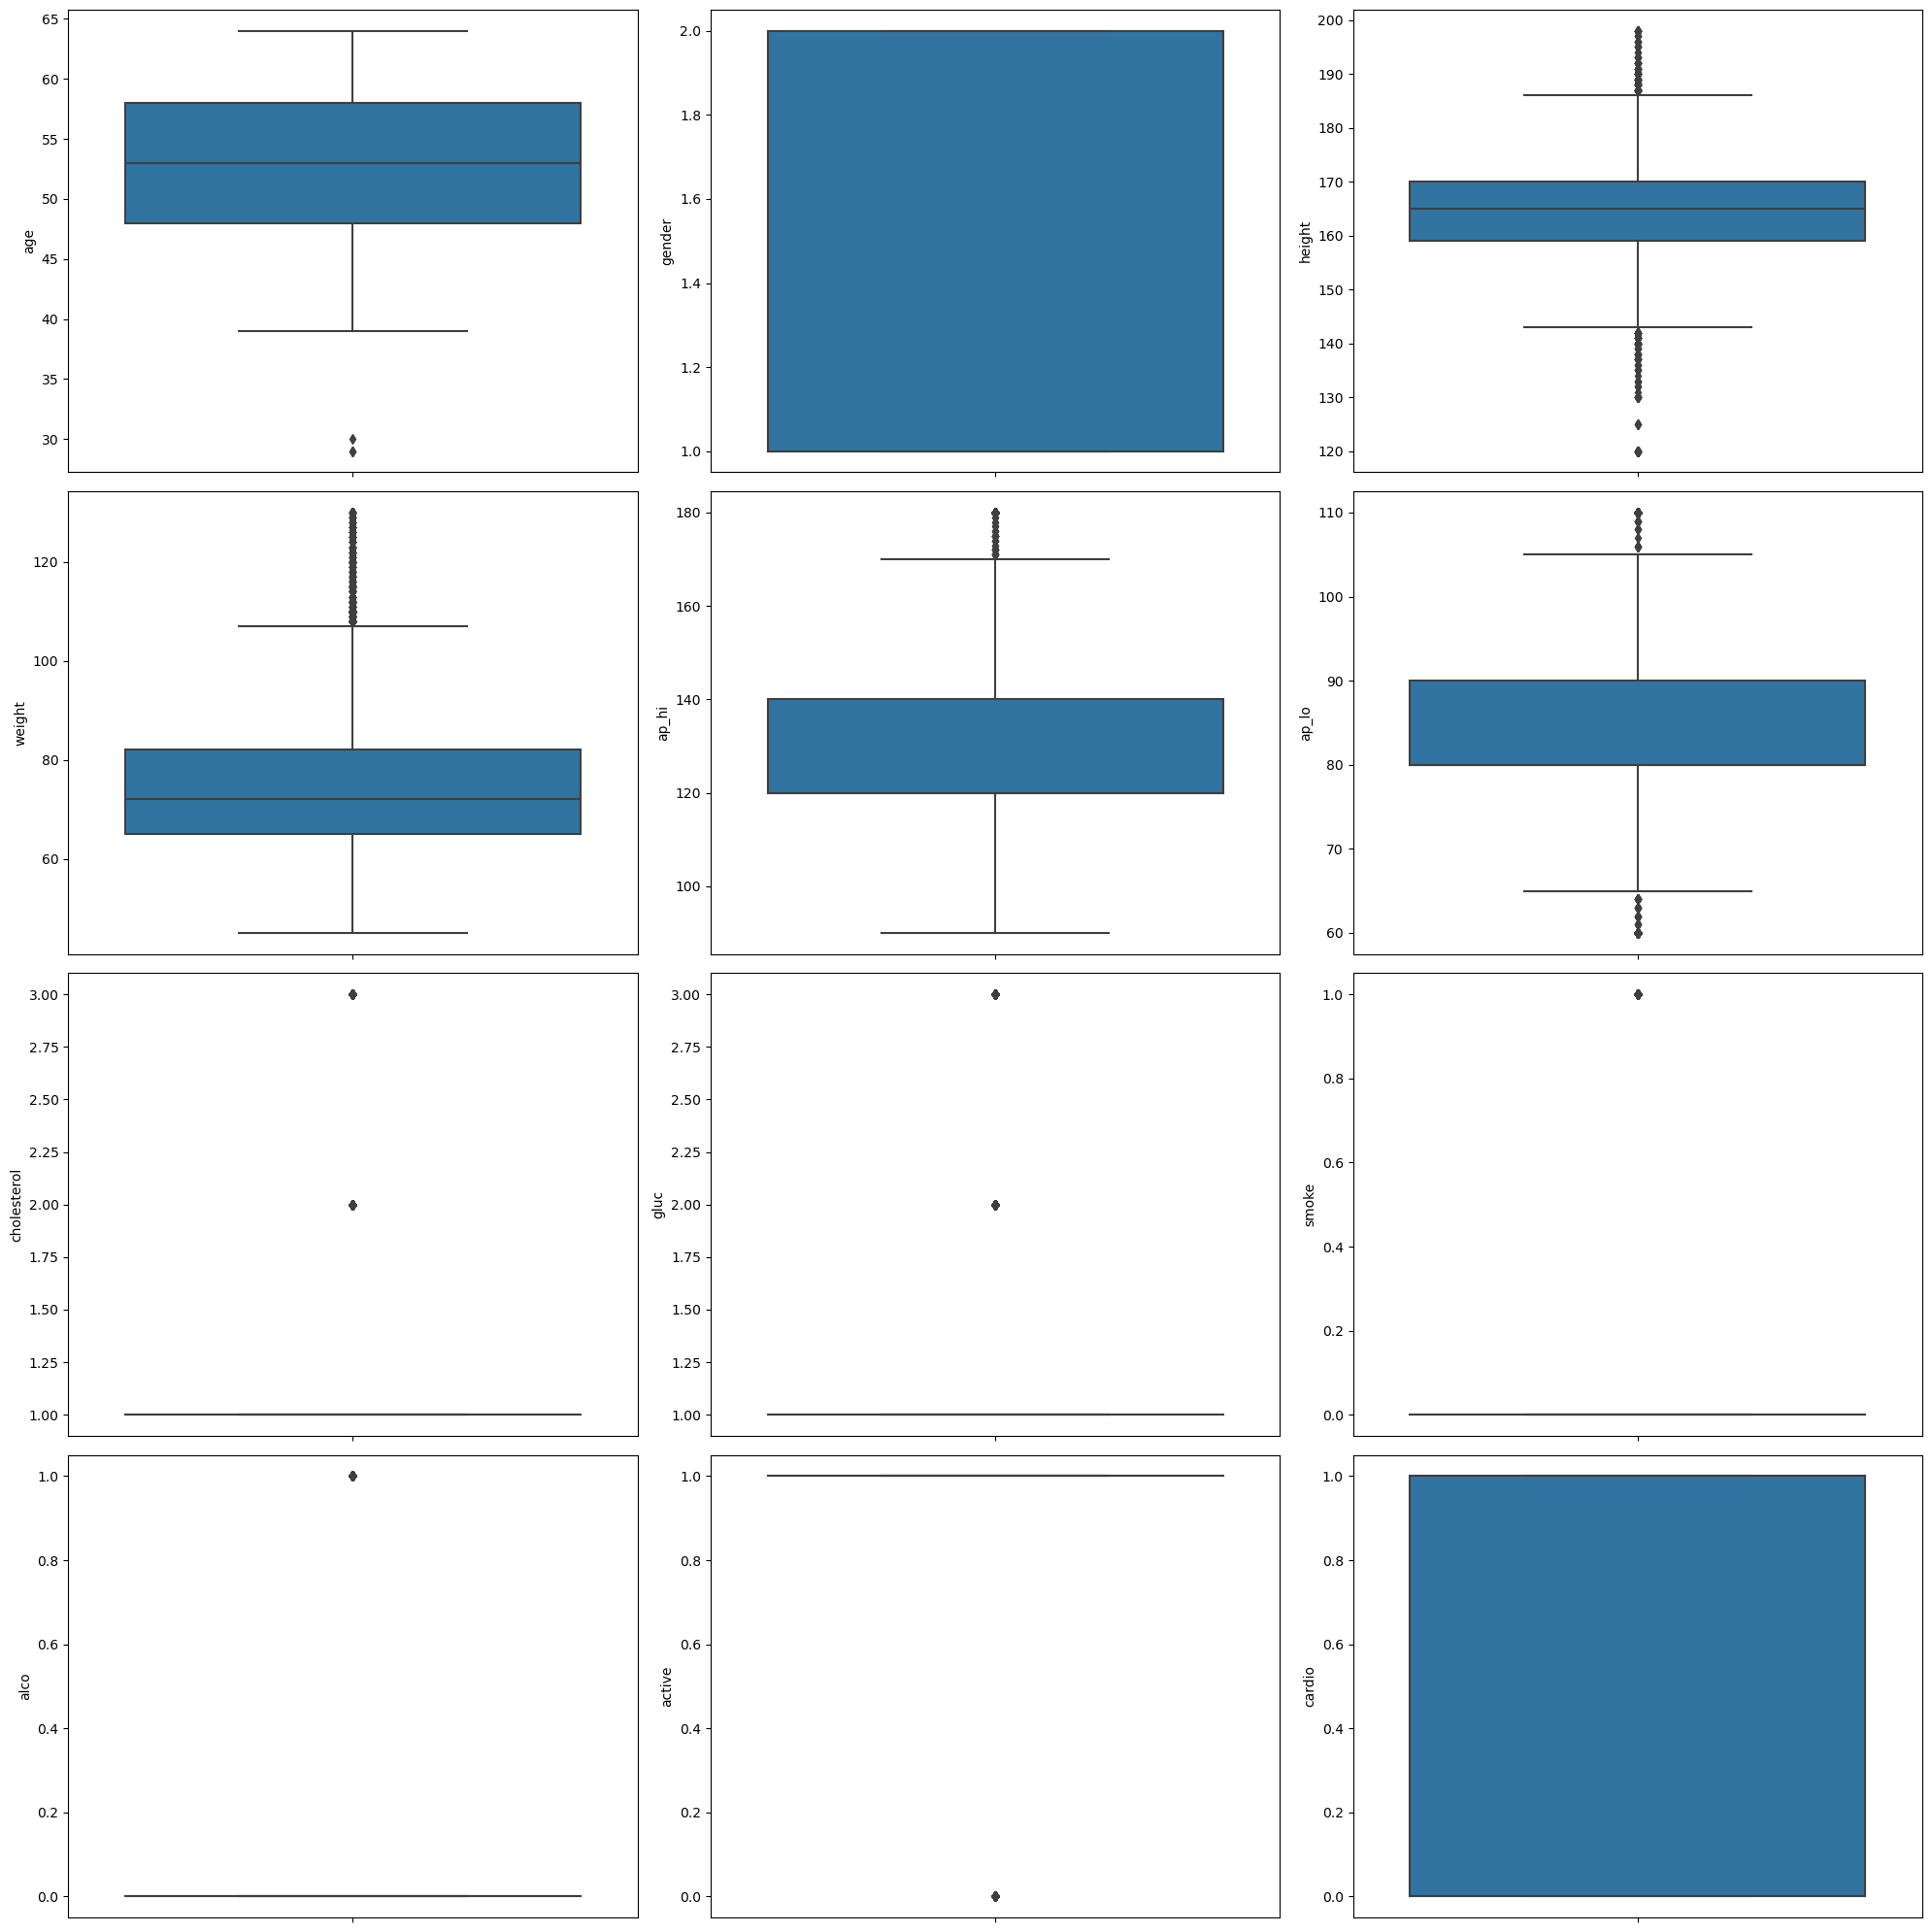

In [146]:
# Plot boxplots for all features
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(y=column, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

As expected we removed alot of outliers (we can see on the describe that we dropped from 70000 observations to 67538 ie 2462 observations removed)

### Data visualisation

Now it is time for some data visualisation to explore our dataset and find out which features impact the most our target

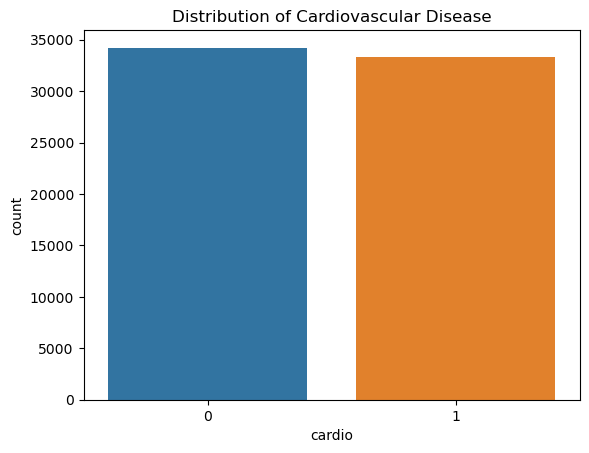

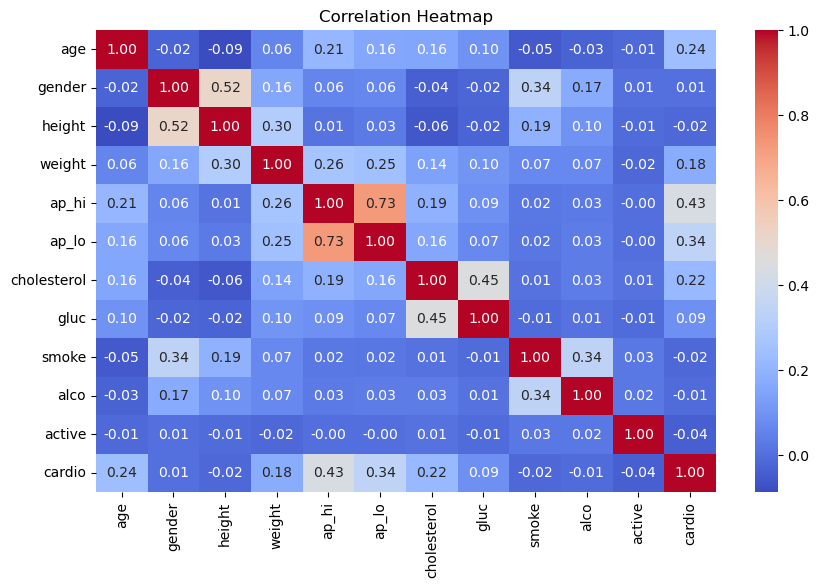

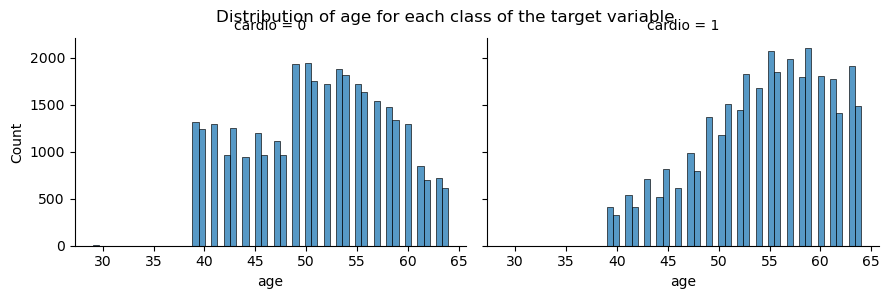

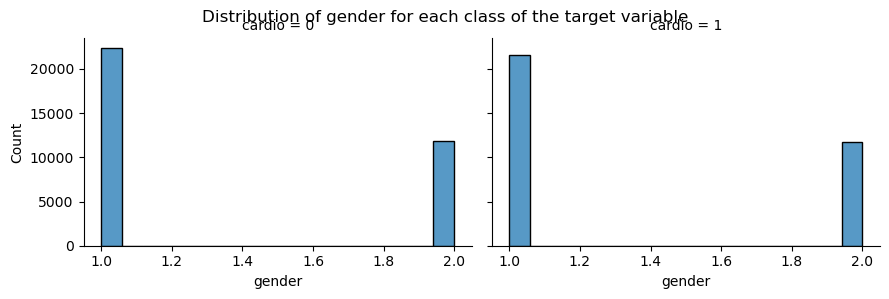

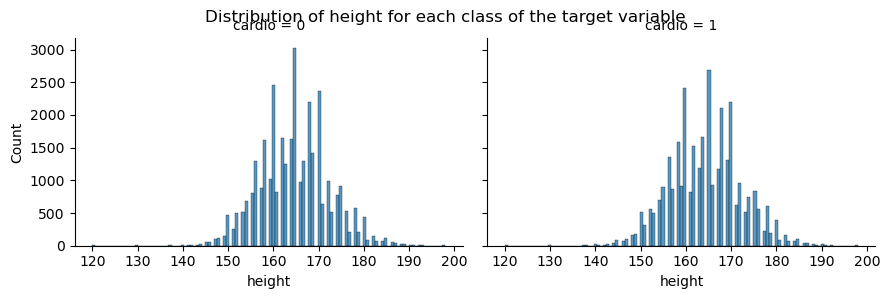

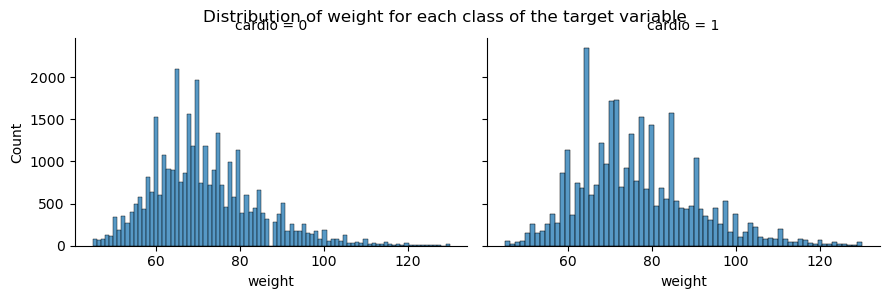

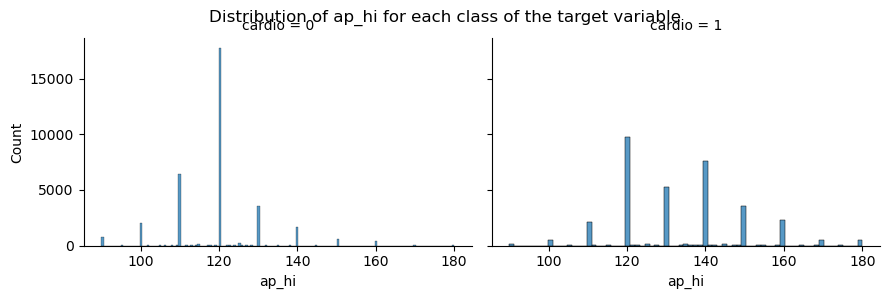

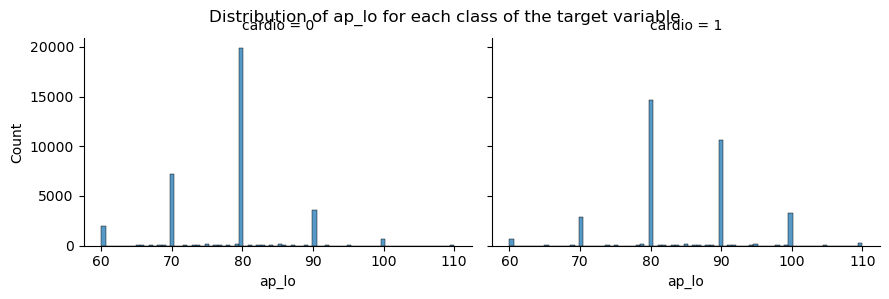

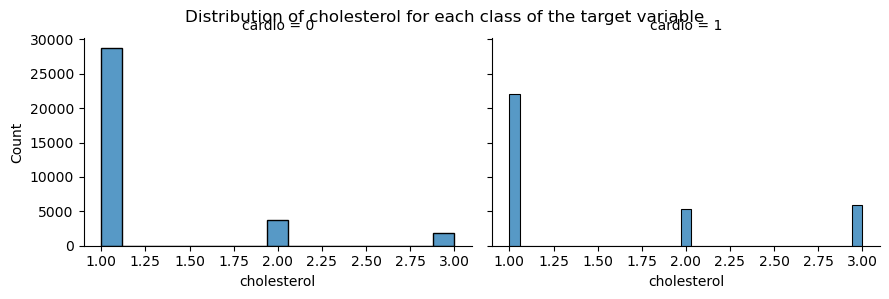

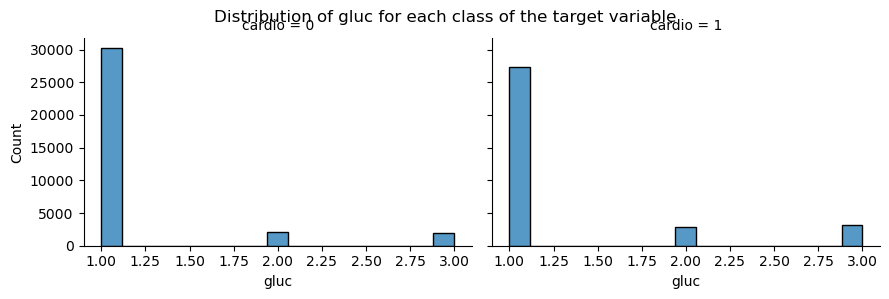

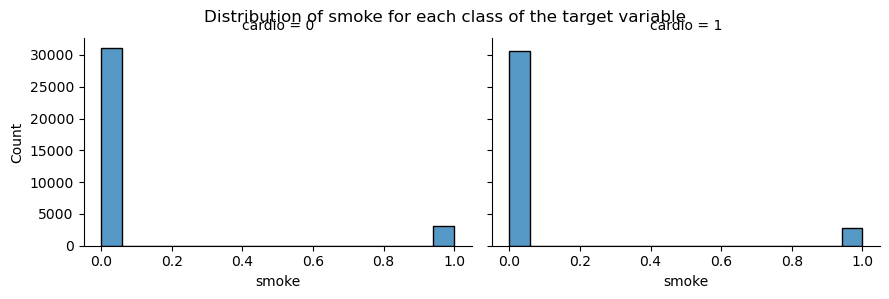

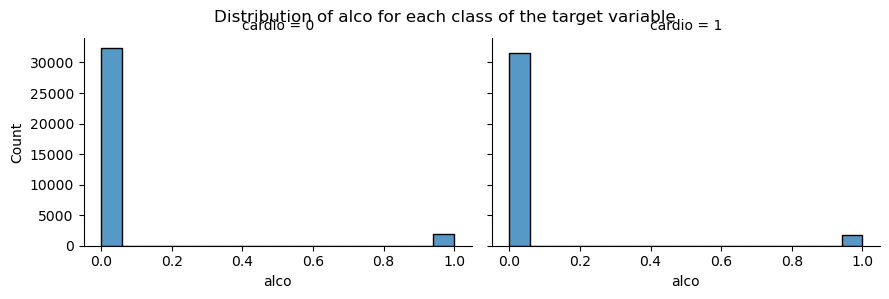

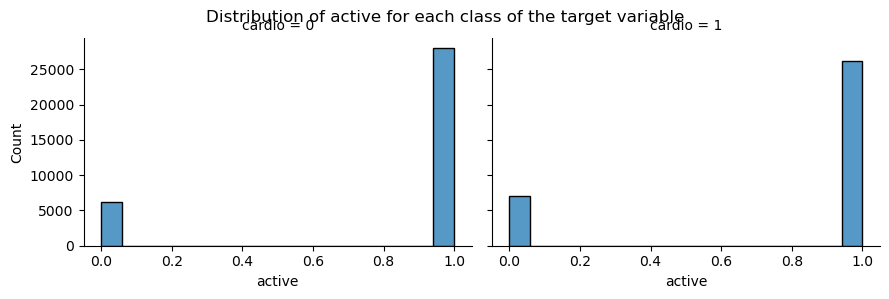

In [147]:
# Check the distribution of the target variable
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease')
plt.show()

# Check the correlation between features and target variable
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Check the distribution of each feature for each class of the target variable
for column in df.columns[:-1]:
    grid = sns.FacetGrid(df, col='cardio', height=3, aspect=1.5)
    grid.map(sns.histplot, column, kde=False)
    plt.suptitle(f'Distribution of {column} for each class of the target variable')
    plt.show()

We can see that blood pressure, cholesterol, weight and age are the target that seems to have the biggest impact on our target

Before proceding to the regression we have to standardize our features in order to avoid any bias due to the differents scale

In [148]:
# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(['cardio'], axis=1))
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-1])
scaled_df['cardio'] = df['cardio']

### Logistic Regression

We will now split our dataset between the test and the train sets (20/80 in that order) and use some metrics to judge the quality of our regression

In [149]:
# Split the dataset into train and test sets
X = scaled_df.drop('cardio', axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a logistic regression model to the train data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Compute the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Confusion Matrix:
 [[5301 1480]
 [2233 4494]]
Accuracy: 0.73
Precision: 0.75
Recall: 0.67
F1 score: 0.71


As we can see we have a decent accuracy of 73%, but we have to keep in mind that in the medical field we want almost always to be certain or a least almost certain that the result is right.
A bad diagnosis could lead to terrible outcome in some cases, therefore even being a decent score 73% wouldn't be precise enough for this model to be used on real patients yet.

In [150]:
# Create a dataframe for the prediction
prediction_data = pd.DataFrame({
    'age': 53,
    'gender': [1], 
    'height': [175],
    'weight': [85],
    'ap_hi': [120],
    'ap_lo': [83], 
    'cholesterol': [2],
    'gluc': [1],
    'smoke': [1],
    'alco': [0],
    'active': [1]
})

# Standardization
prediction_data_std = scaler.transform(prediction_data)

# Prédict the probability of cardiac desease for Arthur's case
prediction = lr.predict_proba(prediction_data_std)

prob_cardio = prediction[0][1]
print("The probability of heart desease for Arthur's case is {:.2%}".format(prob_cardio))


The probability of heart desease for Arthur's case is 48.70%


C:\Users\pierr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


As asked in the subject we can predict that the patient has almost a 50% chance of having a heart desease.

# Remarques :

Moins de jugement sur les résultats, classification report sklearn à la place de mes métriques, ne pas utiliser de df pour le cas particulier => np array, ne pas standardiser/normaliser avant le split, jouer avec plusieurs modèles, faire de la features séléction, échelle logarithmique pour les graph, découper ma heatmap en groupe et parler de l'impacte entre elles et pas juste par rapport à mon target, données de validation et pas de test